In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Mental Health Survey
## Data modelling
## Author: Margarita Savova

### Abstract

We are exploring a dataset on mental health of people in the tech industry and trying to predict if they got treatment or not.

### Getting Data

Let's read the CSV file first. This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

In [3]:
mental_health_data = pd.read_csv('data/mental-health-survey.csv')
mental_health_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
mental_health_data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

Let's make the column names "Pythonic".

In [5]:
mental_health_data.columns = ['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments']

In [6]:
pd.options.display.max_columns = 200

In [7]:
mental_health_data.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
mental_health_data.shape

(1259, 27)

In [9]:
mental_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
timestamp                    1259 non-null object
age                          1259 non-null int64
gender                       1259 non-null object
country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [10]:
mental_health_data.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [11]:
mental_health_data.benefits.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [12]:
mental_health_data.care_options.unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [13]:
mental_health_data.wellness_program.unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [14]:
mental_health_data.seek_help.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [15]:
mental_health_data.anonymity.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [16]:
mental_health_data.leave.unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [17]:
mental_health_data.coworkers.unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [18]:
mental_health_data.comments.unique()

array([nan,
       "I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.",
       'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. ',
       "My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work.",
       'Relatively new job. Ask again later',
       'Sometimes I think  about using drugs for my mental health issues. If i use drugs I feel better',
       'I selected my current employer based on its policies about self care and the quality of their overall health and wellness benefits. I still have residual caution from previous employers who ranged from ambivalent to indifferent to actively hostile regarding mental he

In [19]:
mental_health_data.timestamp.min()

'2014-08-27 11:29:31'

In [20]:
mental_health_data.timestamp.max()

'2016-02-01 23:04:31'

In [21]:
mental_health_data.groupby("self_employed").size()

self_employed
No     1095
Yes     146
dtype: int64

In [22]:
mental_health_data.self_employed = mental_health_data.self_employed.fillna("No")

In [23]:
mental_health_data.groupby("state").size()

state
AL      8
AZ      7
CA    138
CO      9
CT      4
DC      4
FL     15
GA     12
IA      4
ID      1
IL     29
IN     27
KS      3
KY      5
LA      1
MA     20
MD      8
ME      1
MI     22
MN     21
MO     12
MS      1
NC     14
NE      2
NH      3
NJ      6
NM      2
NV      3
NY     57
OH     30
OK      6
OR     29
PA     29
RI      1
SC      5
SD      3
TN     45
TX     44
UT     11
VA     14
VT      3
WA     70
WI     12
WV      1
WY      2
dtype: int64

I am going to drop 'state', because it is too varied to be considered a category for this dataset.

In [24]:
mental_health_data.groupby("work_interfere").size()

work_interfere
Never        213
Often        144
Rarely       173
Sometimes    465
dtype: int64

In [25]:
mental_health_data.no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

We see that 'no_employees' is a categorical feature.

Let's check how many people were treated, because this is going to be our target.

In [26]:
mental_health_data.groupby("treatment").size()

treatment
No     622
Yes    637
dtype: int64

This means that the dataset is pretty balanced. We have almost the same amount of treated and untreated people.

In [27]:
mental_health_data.country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [28]:
mental_health_data.groupby("country").size()

country
Australia                  21
Austria                     3
Bahamas, The                1
Belgium                     6
Bosnia and Herzegovina      1
Brazil                      6
Bulgaria                    4
Canada                     72
China                       1
Colombia                    2
Costa Rica                  1
Croatia                     2
Czech Republic              1
Denmark                     2
Finland                     3
France                     13
Georgia                     1
Germany                    45
Greece                      2
Hungary                     1
India                      10
Ireland                    27
Israel                      5
Italy                       7
Japan                       1
Latvia                      1
Mexico                      3
Moldova                     1
Netherlands                27
New Zealand                 8
Nigeria                     1
Norway                      1
Philippines                 1
Po

We notice that there are some countries with much more entries then others, so we might consider only them as relevant.

In [29]:
pd.crosstab(mental_health_data.country, mental_health_data.treatment)

treatment,No,Yes
country,,
Australia,8,13
Austria,3,0
"Bahamas, The",0,1
Belgium,5,1
Bosnia and Herzegovina,1,0
Brazil,4,2
Bulgaria,2,2
Canada,35,37
China,1,0


In [30]:
mental_health_data.gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [31]:
mental_health_data.gender.unique().size

49

In [32]:
mental_health_data.groupby("gender").size()

gender
A little about you                                  1
Agender                                             1
All                                                 1
Androgyne                                           1
Cis Female                                          1
Cis Male                                            2
Cis Man                                             1
Enby                                                1
F                                                  38
Femake                                              1
Female                                            121
Female                                              2
Female (cis)                                        1
Female (trans)                                      2
Genderqueer                                         1
Guy (-ish) ^_^                                      1
M                                                 116
Mail                                                1
Make                 

In [33]:
mental_health_data.replace({"gender": {"F": "female", "Female": "female", "f": "female"}}, inplace = True)
mental_health_data.replace({"gender": {"M": "male", "m": "male", "Male": "male"}}, inplace = True)

In [34]:
mental_health_data.groupby("gender").size()

gender
A little about you                                  1
Agender                                             1
All                                                 1
Androgyne                                           1
Cis Female                                          1
Cis Male                                            2
Cis Man                                             1
Enby                                                1
Femake                                              1
Female                                              2
Female (cis)                                        1
Female (trans)                                      2
Genderqueer                                         1
Guy (-ish) ^_^                                      1
Mail                                                1
Make                                                4
Mal                                                 1
Male                                                3
Male (CIS)           

In [35]:
mental_health_data_cleaned = mental_health_data.drop(["timestamp", "state", "comments"], axis = 1)

In [36]:
mental_health_data_cleaned = mental_health_data_cleaned.loc[(mental_health_data_cleaned.age > 0) & (mental_health_data_cleaned.age < 200)]
mental_health_data_cleaned

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,male,United States,No,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,female,United States,No,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,male,Canada,No,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,female,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,male,Canada,No,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


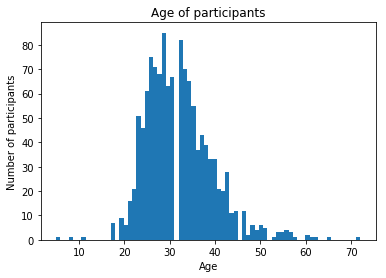

In [37]:
plt.hist(mental_health_data_cleaned.age, bins = mental_health_data_cleaned.age.max(), log = False)
plt.title("Age of participants")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.show()

In [38]:
top_countries = mental_health_data_cleaned.groupby("country").size().sort_values(ascending = False)
top_countries.head()

country
United States     748
United Kingdom    184
Canada             72
Germany            45
Ireland            27
dtype: int64

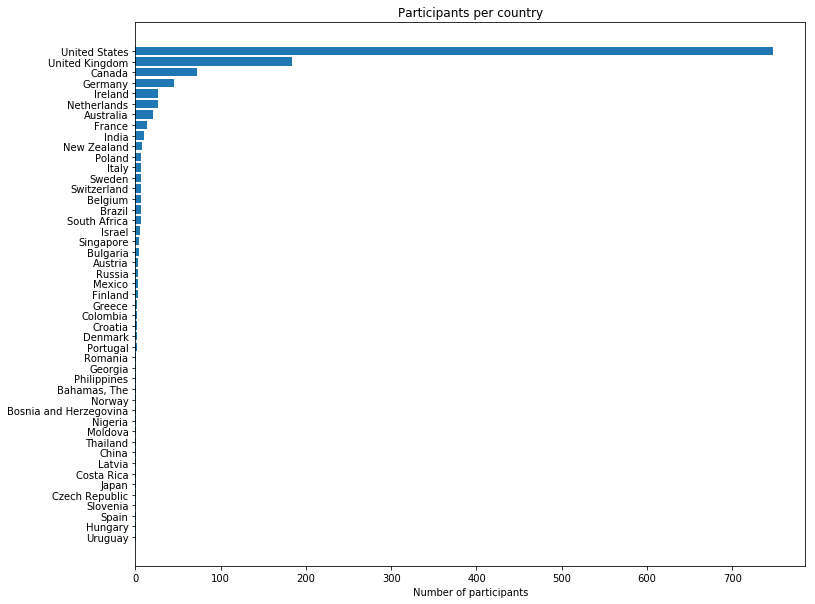

In [39]:
plt.figure(figsize = (12, 10))

plt.barh(range(len(top_countries.index)), top_countries)

plt.title("Participants per country")
plt.xlabel("Number of participants")
plt.yticks(range(len(top_countries)), top_countries.index)
plt.gca().invert_yaxis()
plt.show()

In [40]:
mental_health_attributes = mental_health_data_cleaned.drop("treatment", axis = 1)
mental_health_labels = mental_health_data_cleaned.treatment

In [41]:
mental_health_attributes.shape

(1254, 23)

In [42]:
mental_health_attributes = pd.get_dummies(mental_health_attributes)

In [43]:
mental_health_attributes.shape

(1254, 150)

In [44]:
mental_health_attributes.head()


,age,gender_A little about you,gender_Agender,gender_Androgyne,gender_Cis Female,gender_Cis Male,gender_Cis Man,gender_Enby,gender_Femake,gender_Female,gender_Female (cis),gender_Female (trans),gender_Genderqueer,gender_Guy (-ish) ^_^,gender_Mail,gender_Make,gender_Mal,gender_Male,gender_Male (CIS),gender_Male-ish,gender_Malr,gender_Man,gender_Nah,gender_Neuter,gender_Trans woman,gender_Trans-female,gender_Woman,gender_cis male,gender_cis-female/femme,gender_femail,gender_female,gender_fluid,gender_maile,gender_male,gender_male leaning androgynous,gender_msle,gender_non-binary,"gender_ostensibly male, unsure what that really means",gender_queer,gender_queer/she/they,gender_something kinda male?,gender_woman,country_Australia,country_Austria,"country_Bahamas, The",country_Belgium,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_China,country_Colombia,country_Costa Rica,country_Croatia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hungary,country_India,country_Ireland,country_Israel,country_Italy,country_Japan,country_Latvia,country_Mexico,country_Moldova,country_Netherlands,country_New Zealand,country_Nigeria,country_Norway,country_Philippines,country_Poland,country_Portugal,country_Romania,country_Russia,country_Singapore,country_Slovenia,country_South Africa,country_Spain,country_Sweden,country_Switzerland,country_Thailand,country_United Kingdom,country_United States,country_Uruguay,self_employed_No,self_employed_Yes,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_1-5,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,remote_work_No,remote_work_Yes,tech_company_No,tech_company_Yes,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,leave_Don't know,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0
1,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
3,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1

Now we remove the attributes that have just a couple of examples each and give us little information.

In [45]:
mental_health_attributes = mental_health_attributes.drop(['gender_Male-ish', 'gender_maile',
       'gender_Trans-female', 'gender_Cis Female', 'gender_something kinda male?',
       'gender_Cis Male', 'gender_Woman', 'gender_Mal', 'gender_Male (CIS)', 'gender_queer/she/they',
       'gender_non-binary', 'gender_Femake', 'gender_woman', 'gender_Make', 'gender_Nah', 'gender_Enby',
       'gender_fluid', 'gender_Genderqueer', 'gender_Female ', 'gender_Androgyne', 'gender_Agender',
       'gender_cis-female/femme', 'gender_Guy (-ish) ^_^', 'gender_male leaning androgynous',
       'gender_Male ', 'gender_Man', 'gender_Trans woman', 'gender_msle', 'gender_Neuter', 'gender_Female (trans)',
       'gender_queer', 'gender_Female (cis)', 'gender_Mail', 'gender_cis male', 'gender_A little about you',
       'gender_Malr', 'gender_femail', 'gender_Cis Man',
       'gender_ostensibly male, unsure what that really means'], axis = 1)

In [46]:
mental_health_attributes.shape

(1254, 111)

In [47]:
mental_health_attributes = mental_health_attributes.drop(['country_Bulgaria',
       'country_Portugal', 'country_Switzerland', 'country_Poland',
       'country_Russia', 'country_Mexico', 'country_Brazil', 'country_Slovenia', 'country_Costa Rica',
       'country_Austria', 'country_South Africa', 'country_Italy', 'country_Sweden',
       'country_Colombia', 'country_Latvia', 'country_Romania', 'country_Belgium', 'country_New Zealand',
        'country_Spain', 'country_Finland', 'country_Uruguay', 'country_Israel',
       'country_Bosnia and Herzegovina', 'country_Hungary', 'country_Singapore', 'country_Japan',
       'country_Nigeria', 'country_Croatia', 'country_Norway', 'country_Thailand', 'country_Denmark',
       'country_Bahamas, The', 'country_Greece', 'country_Moldova', 'country_Georgia', 'country_China',
       'country_Czech Republic', 'country_Philippines'], axis = 1)

In [48]:
mental_health_attributes.shape

(1254, 73)

In [49]:
mental_health_attributes.head()

,age,gender_female,gender_male,country_Australia,country_Canada,country_France,country_Germany,country_India,country_Ireland,country_Netherlands,country_United Kingdom,country_United States,self_employed_No,self_employed_Yes,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_1-5,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,remote_work_No,remote_work_Yes,tech_company_No,tech_company_Yes,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,leave_Don't know,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,37,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0
1,44,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,32,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
3,31,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,31,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0


In [50]:
mental_health_labels = mental_health_labels.replace(to_replace = {'No': 0, 'Yes': 1})

In [51]:
mental_health_labels.shape

(1254,)

In [52]:
mental_health_labels.head()

0    1
1    0
2    0
3    1
4    0
Name: treatment, dtype: int64

In [53]:
scaler = MinMaxScaler()
scaler.fit(mental_health_attributes)
mental_health_attributes = scaler.transform(mental_health_attributes)

In [54]:
mental_health_attributes_train_val, mental_health_attributes_test, mental_health_labels_train_val, mental_health_labels_test = \
        train_test_split(mental_health_attributes, mental_health_labels, train_size = 0.8, stratify = mental_health_labels)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [55]:
mental_health_attributes_train, mental_health_attributes_val, mental_health_labels_train, mental_health_labels_val = \
        train_test_split(mental_health_attributes_train_val, mental_health_labels_train_val, test_size = len(mental_health_labels_test), stratify = mental_health_labels_train_val)

In [56]:
mental_health_attributes_train.shape, mental_health_attributes_val.shape, mental_health_attributes_test.shape

((752, 73), (251, 73), (251, 73))

First, we train a logistic regression on the training sample.

In [57]:
logistic_regression = LogisticRegression()
logistic_regression.fit(mental_health_attributes_train, mental_health_labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Next we can use accuracy score, because we have balanced classes.

In [58]:
logistic_regression.score(mental_health_attributes_train, mental_health_labels_train)

0.8523936170212766

In [59]:
logistic_regression.score(mental_health_attributes_val, mental_health_labels_val)

0.8167330677290837

Results on the train and test sample are similar, which means that we don't have high variance, but rather may have some bias. We can try to reduce it by reducing the regularization or increasing the hyperparameter C.

Let's try to use a stratified k-fold cross-validation split, because we don't have so much data.

In [60]:
k_fold = list(StratifiedKFold(n_splits=5).split(mental_health_attributes_train, mental_health_labels_train))

In [61]:
params = {'C': [0.01, 0.1, 1, 10, 100, 10000, 1e6],
          'fit_intercept': [True, False]}

grid_search = GridSearchCV(LogisticRegression(), params, scoring = 'accuracy', cv=k_fold)

grid_search.fit(mental_health_attributes_train, mental_health_labels_train)

GridSearchCV(cv=[(array([150, 152, ..., 750, 751]), array([  0,   1, ..., 149, 151])), (array([  0,   1, ..., 750, 751]), array([150, 152, ..., 309, 311])), (array([  0,   1, ..., 750, 751]), array([291, 293, ..., 452, 453])), (array([  0,   1, ..., 750, 751]), array([450, 454, ..., 612, 616])), (array([  0,   1, ..., 612, 616]), array([594, 596, ..., 750, 751]))],
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 10000, 1000000.0], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We use cross-validation to train and optimize the hyperparameters for a decision tree classifier.

In [63]:
params = {'max_depth': [1, 5, 7, 15, 20],
          'min_samples_leaf': [2, 5, 10, 12],
          'max_leaf_nodes': [5, 10, 20]}

grid_search = GridSearchCV(DecisionTreeClassifier(), params, scoring = 'accuracy', cv=k_fold)
grid_search.fit(mental_health_attributes_train, mental_health_labels_train)

tree_classifier = grid_search.best_estimator_

print("Decision tree; best score:", grid_search.best_score_)

Decision tree; best score: 0.8218085106382979


In [64]:
tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [65]:
params = {'n_estimators': [100, 200, 300, 400, 500],
          'max_depth': [5, 10, 20, 50, 100]}

grid_search = GridSearchCV(RandomForestClassifier(), params, scoring = 'accuracy', cv=k_fold)
grid_search.fit(mental_health_attributes_train, mental_health_labels_train)

forest_classifier = grid_search.best_estimator_

print("Random forest; best score:", grid_search.best_score_)

Random forest; best score: 0.7938829787234043


In [66]:
forest_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
params = {'C': [100, 200, 300]}

grid_search = GridSearchCV(LinearSVC(), params, scoring = 'accuracy', cv=k_fold)
grid_search.fit(mental_health_attributes_train, mental_health_labels_train)

linear_svm_classifier = grid_search.best_estimator_

print("Linear SVM; best score:", grid_search.best_score_)

Linear SVM; best score: 0.7699468085106383


In [68]:
linear_svm_classifier

LinearSVC(C=200, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [69]:
params = {'C': [100, 200, 300],
          'gamma': [0.001, 0.01, 0.1, 0.2]}

grid_search = GridSearchCV(SVC(kernel='rbf'), params, scoring = 'accuracy', cv=k_fold)
grid_search.fit(mental_health_attributes_train, mental_health_labels_train)

gaussian_svm_classifier = grid_search.best_estimator_


print("Gaussian SVM; best score:", grid_search.best_score_)

Gaussian SVM; best score: 0.836436170212766


In [70]:
gaussian_svm_classifier

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Conclusion

Logistic regression has the best score.